In [ ]:
Case Study
Objectives:
• Learn to use Cross validation to pick the best models.
Questions:
1. Load the data from “glass.csv” and make a bar plot of different types of glasses.
2. Make a train_test split and fit a single decision tree classifier.
3. Make a k-fold split with 3 splits and measure the accuracy score with each split [Hint: Refer to KFold module under sklearn’s model selection.]
4. Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation.
[Hint: Define a range of estimators and feed in range as param_grid]
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data= '/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_14_Model_Selection_and_Boosting/glass.csv'

df=pd.read_csv(data)

df.head(8)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1


In [4]:
df.shape

(214, 10)

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.count()

RI      214
Na      214
Mg      214
Al      214
Si      214
K       214
Ca      214
Ba      214
Fe      214
Type    214
dtype: int64

In [9]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "Type": {}'.format(df['Type'].unique()))

Missing values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Number of duplicated records: 1

Unique values of "Type": [1 2 3 5 6 7]


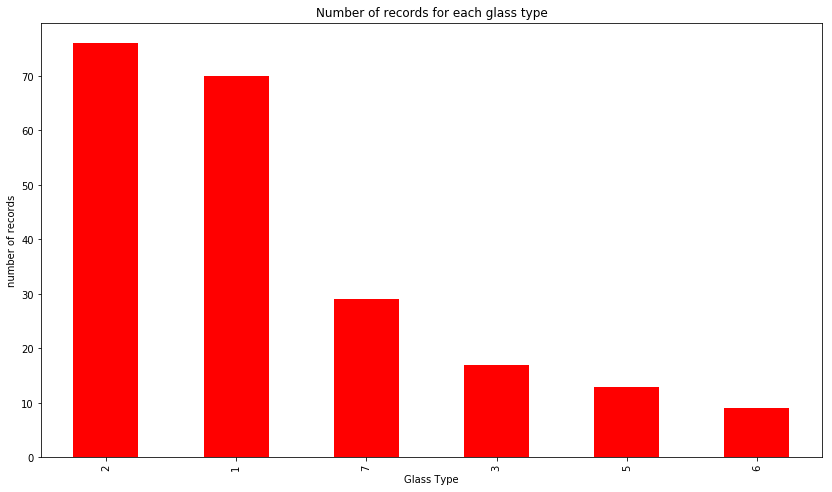

In [8]:
#1. Load the data from “glass.csv” and make a bar plot of different types of glasses.
ax = df['Type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of records for each glass type", color='red')
ax.set_xlabel("Glass Type")
ax.set_ylabel("number of records")
plt.show()

In [10]:
df.head(7)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1


In [11]:
X=df.iloc[:,0:9]

Y=df[['Type']]

In [13]:
X.head(8)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00


In [14]:
Y.head(7)

,Type
0,1
1,1
2,1
3,1
4,1
5,1
6,1


In [ ]:
#lets apply the MinMax scaling pre-processing technique to normalize the data set.
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

#This technique re-scales the data between a specified range(in this case, between 0–1), to ensure that certain 
#features do not affect the final prediction more than the other features.


In [15]:
#2. Make a train_test split and fit a single decision tree classifier.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [17]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer

In [21]:
tree = DecisionTreeClassifier(random_state=0)

model=tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

accuracy=metrics.accuracy_score(y_test,y_pred)

print(accuracy)

0.6744186046511628


In [20]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))

predicted_data = tree.predict(x_test)
#print("Accuracy on test set: {:.3f}".format(tree.score(test_x, test_y)))

metrics.accuracy_score(y_pred, y_test)

Decision Tree
Accuracy on training set: 1.000


0.6744186046511628

In [36]:
#3. Make a k-fold split with 3 splits and measure the accuracy score with each split 
#[Hint: Refer to KFold module under sklearn’s model selection.]


from sklearn.model_selection import cross_val_score

#knn=KNeighborsClassifier(n_neighbors=4)

print(cross_val_score(model,X,Y,cv=10,scoring='accuracy').mean())

0.45828847481021395


In [39]:
#3. Make a k-fold split with 3 splits and measure the accuracy score with each split 
#[Hint: Refer to KFold module under sklearn’s model selection.]


#applying adaboost boosting algorithm

from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")


kfold=KFold(n_splits=10,random_state=5)


model=AdaBoostClassifier(n_estimators=30,random_state=5)

results=model_selection.cross_val_score(model,X,Y,cv=kfold)

print(results.mean())

#base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak 
#learner for training purpose. You can also specify different machine learning algorithms.

#n_estimators: Number of weak learners to train iteratively.

#learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

#What is K-Fold Cross Validation?

#K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a 
#testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set 
#is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest 
#are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve 
#as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.


#Here, we have used 10-Fold CV (n_splits=10), where the data will be split into 10 folds. 
#We are printing out the indexes of the training and the testing sets in each iteration to clearly see the process 
#of K-Fold CV where the traini


0.11796536796536797


In [ ]:
'''
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

'''

In [ ]:
#4. Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer 
#along with a 10-fold cross validation.

#[Hint: Define a range of estimators and feed in range as param_grid]



In [44]:
rfc=RandomForestClassifier(random_state=42)

In [45]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [57]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [59]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [60]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
pred=rfc1.predict(x_test)

In [62]:
from sklearn import metrics
print("Accuracy for Random Forest on CV data: ",metrics.accuracy_score(y_test,pred))


Accuracy for Random Forest on CV data:  0.8372093023255814


In [ ]:
'''
from sklearn.model_selection import GridSearchCV 
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 
'''

In [ ]:
'''
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)
'''

In [ ]:
'''
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=10,gamma=0.01) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
'''

In [63]:
'''
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
'''

'\n#Import scikit-learn metrics module for accuracy calculation\nfrom sklearn import metrics\n\n# Model Accuracy: how often is the classifier correct?\nprint("Accuracy:",metrics.accuracy_score(y_test, y_pred))\n'

In [ ]:
'''
# print(metrics.classification_report(expected, predicted))

print(metrics.classification_report(y_test, y_pred))

'''

In [ ]:
'''

Grid Search Parameter Tuning

Grid search is an approach to parameter tuning that will methodically build and evaluate a model 
for each combination of algorithm parameters specified in a grid.

The recipe below evaluates different alpha values for the Ridge Regression algorithm on the standard diabetes dataset. 
This is a one-dimensional grid search.

Grid Search for Algorithm TuningPython

# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the diabetes datasets
dataset = datasets.load_diabetes()
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(dataset.data, dataset.target)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

'''

'''
Random Search Parameter Tuning

Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution 
(i.e. uniform) for a fixed number of iterations. A model is constructed and evaluated 
for each combination of parameters chosen.

The recipe below evaluates different alpha random values between 0 and 1 for the Ridge Regression algorithm 
on the standard diabetes dataset.


Grid Search for Algorithm TuningPython


# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the diabetes datasets
dataset = datasets.load_diabetes()
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(dataset.data, dataset.target)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

'''

In [41]:
'''
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the diabetes datasets
dataset = datasets.load_diabetes()
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(dataset.data, dataset.target)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

'''

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.48879020446060173
0.001
